In [202]:
import numpy as np
import pandas as pd
# for cleaning
import regex as re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import WordNetLemmatizer
from wordcloud import WordCloud
# for tokenizing
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import time
# reading file form data directory
import os
# for clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [143]:
# get names of all the files to be clustered
files = os.listdir('/mnt/c/_programming/medius-intern-challenge/ClusterDocs/data')
# ignore the .DS_STORE file
files.remove(files[0])
# store the contents into a list
docsList = []
path = '/mnt/c/_programming/medius-intern-challenge/ClusterDocs/data/'
for file in files:
    p = path+file
    # to handle different encodings
    f = open(p, encoding="ascii", errors="surrogateescape")
    contents = f.read()
    docsList.append(contents)
    

In [203]:
# process the data by removing all punctuations and stop words
cleanDocs = []
# regex patterns for letters, digits, unedrscores
p1 = re.compile(r'^\W+|\W+$')
# pattern for newline, tabs, spaces
p2 = re.compile(r'\s')
# pattern for punctuations
p3 = re.compile(r'[^a-zA-Z0-9]')
lemma = WordNetLemmatizer()
for doc in docsList:
    tokens = word_tokenize(doc)
    newToken = ""
    for word in tokens:
        if not p1.match(word) and not p2.match(word) and not p3.match(word) and word not in stopwords.words('english'):
            newToken = newToken + " " + word.lower()
    newToken = lemma.lemmatize(newToken)
    cleanDocs.append(newToken)

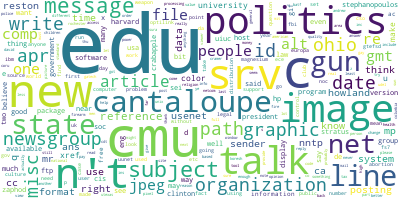

In [207]:
# Visualising the common words in the data
long_string = ','.join(list(cleanDocs))
# Create a WordCloud object
wordcloud = WordCloud(collocations=False,background_color="white", max_words=1000, contour_width=3, contour_color='red')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()